In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuitpn i have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables .drop() to have a more concise dataset.

In [ ]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



In [ ]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [ ]:
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
#plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
#plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [ ]:
df1['SensorTimestamp']


In [ ]:
pd.to_datetime(df1['SensorTimestamp'])

new variable datetime added

In [ ]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [ ]:
df1['datetime']


In [ ]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

In [ ]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

In [ ]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [ ]:
#df3

In [ ]:
df3.describe()

In [ ]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

In [ ]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

In [ ]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [ ]:
df3.dtypes

In [ ]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [ ]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

In [ ]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.4225, .7669
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

In [ ]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

In [ ]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
s10 = np.random.normal(10.76,.76,200)

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s10),shade=True)


some ditsributions i tried to to get a better distribuitn match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

#standard cauch

In [ ]:

s8 = np.random.standard_cauchy(200)
s8 = s8[(s8>8.6) & (s8<11)]  # truncate distribution so it plots well


In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s8),shade=True)


#standard gamma

In [ ]:

# Draw 10 samples from a standard Gamma distribution with shape 2
samples = np.random.standard_gamma(1, 200)


In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((samples),shade=True)

#random triangular

In [ ]:
import matplotlib.pyplot as plt
s2 = np.random.standard_t(10, size=200)

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s2),shade=True)

##Uniform Dsitribution

In [ ]:
s4 = np.random.uniform(8.7,11.3,100)



In [ ]:

sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s4),shade=True)

In [ ]:
rng55 = np.random.default_rng()
mu1, sigma1 = 10.76, .76
ts55 = pd.DataFrame(data=rng55.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air'])
ts55

In [ ]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts55['Synthesised Air'],shade=True)

In [ ]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [ ]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

In [ ]:
a = 5

# Generate 1000 samples from the Weibull distribution
s9 = np.random.normal(10.4225,.7669, 200)
#s9

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s9),shade=True)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

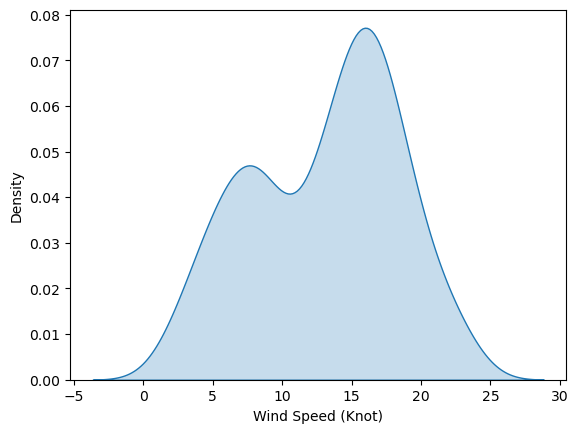

In [476]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
#sns.kdeplot(ts1['Synthesised Wind Speed (Knot)'],shade=True)

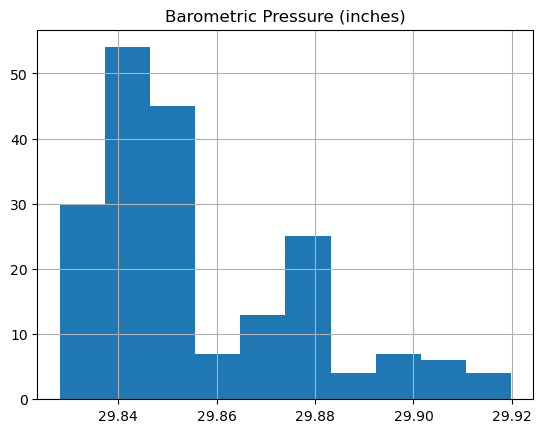

In [477]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [478]:
rng3 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.860030
2023-11-08 00:01:33,29.892564
2023-11-08 00:02:33,29.826426
2023-11-08 00:03:33,29.858608
2023-11-08 00:04:33,29.881902
...,...
2023-11-08 01:35:33,29.859762
2023-11-08 01:36:33,29.865433
2023-11-08 01:37:33,29.866823
2023-11-08 01:38:33,29.875754


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

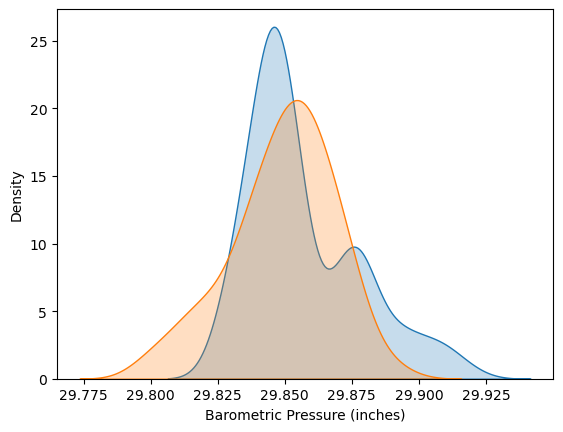

In [479]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

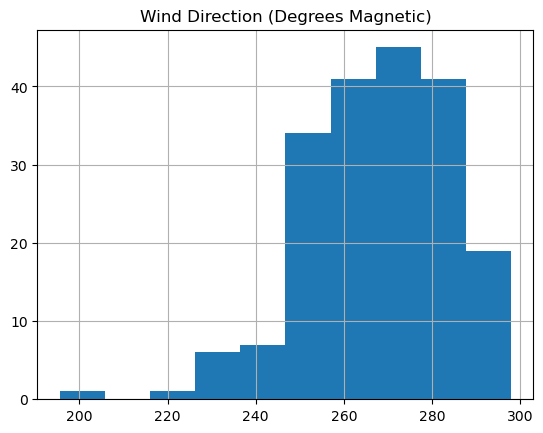

In [480]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

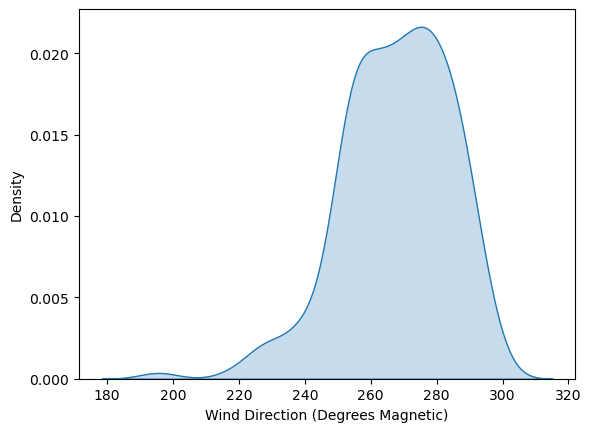

In [481]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [482]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,271.359184
2023-11-08 00:01:33,253.679038
2023-11-08 00:02:33,300.525386
2023-11-08 00:03:33,268.045321
2023-11-08 00:04:33,271.845176
...,...
2023-11-08 01:35:33,262.746083
2023-11-08 01:36:33,281.864525
2023-11-08 01:37:33,269.766300
2023-11-08 01:38:33,278.438693


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

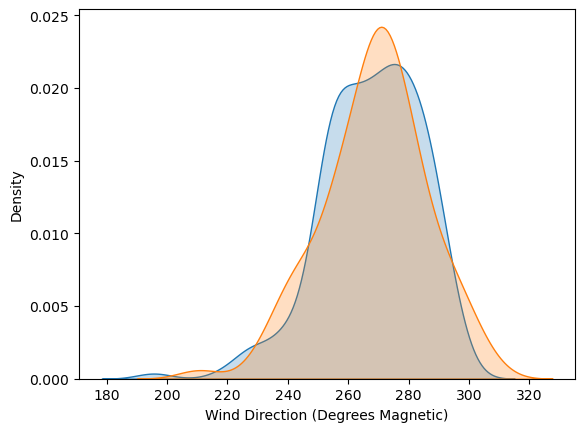

In [483]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

In [484]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [485]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [486]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

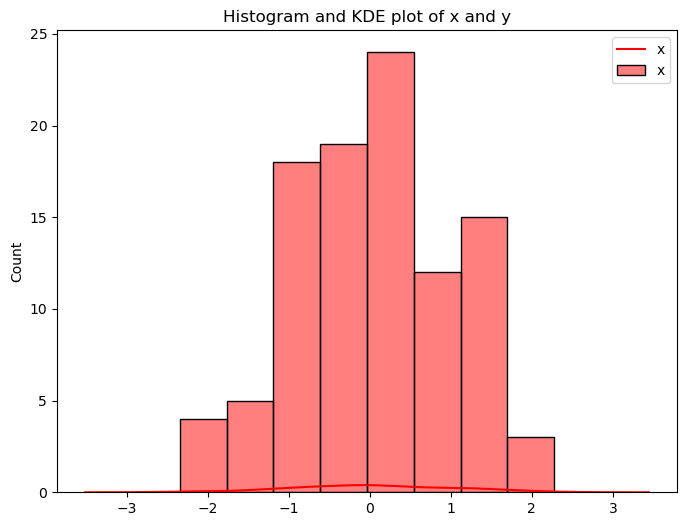

In [487]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [488]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

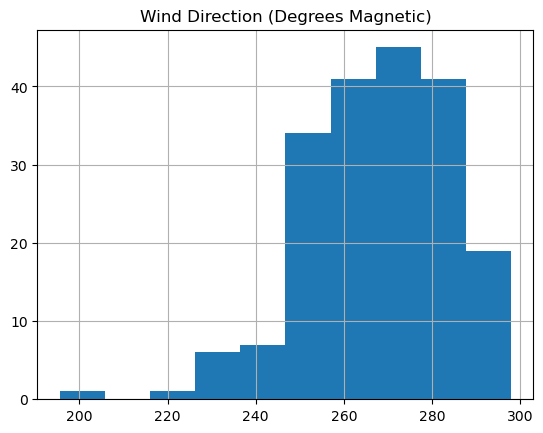

In [489]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [490]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,275.861232
2023-11-08 00:01:33,275.557487
2023-11-08 00:02:33,277.983822
2023-11-08 00:03:33,251.883541
2023-11-08 00:04:33,308.911313
...,...
2023-11-08 01:35:33,264.489924
2023-11-08 01:36:33,281.074648
2023-11-08 01:37:33,271.777291
2023-11-08 01:38:33,292.362085


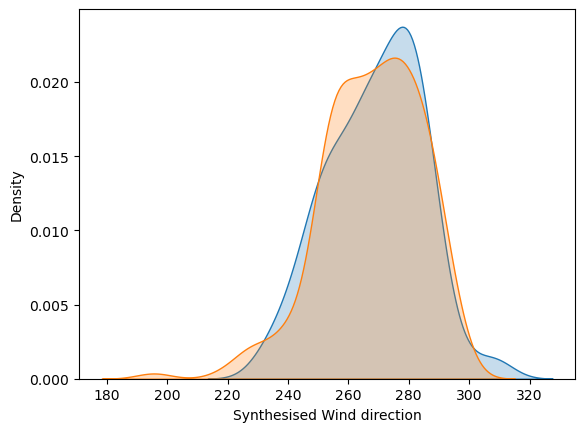

In [491]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [492]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

array([12,  7,  9,  8, 11, 13, 10, 15,  7, 23, 13,  8, 12, 10, 12, 11, 13,
       10,  7,  5, 13, 15, 16, 10,  9,  4, 19,  5,  8, 12, 19, 10,  9,  8,
        9, 11,  9, 12, 14, 12, 16,  8, 10, 15, 16, 12, 11, 12, 13,  6,  6,
       12, 11, 13,  7, 13, 12, 12, 13, 10, 12,  7,  8,  8, 20, 11, 13, 14,
       12,  8, 12, 15, 12,  5,  5, 14, 10,  6, 14, 14, 15, 15, 10,  5, 15,
        9, 12,  9, 10,  9, 10, 12, 14,  8,  5, 11, 15,  7,  5, 10])

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

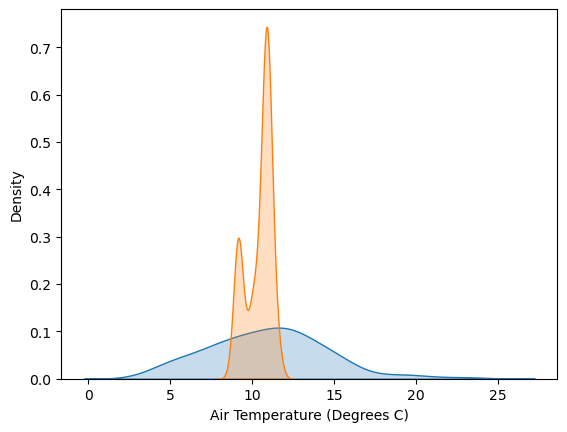

In [493]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [494]:

values = np.random.rayleigh(10.76, 200)
#values

array([ 8.30618335, 18.52355169,  9.18799134, 12.4606907 , 12.78030524,
        8.77249162, 18.25074176, 17.12116502,  8.01142189, 24.36538962,
       13.1115535 ,  9.75787001, 13.18394873,  3.04326116,  5.33207076,
       16.52367835,  8.54575404, 28.23285244, 19.03051458, 22.87345685,
        5.77293314,  6.3674024 , 19.27706056, 17.26399465, 17.77645093,
       15.28957941, 24.65207187, 23.91838034,  5.76851334,  7.7159105 ,
       30.83258895, 19.59595282, 13.59387574,  2.70403169, 17.78341943,
       10.68427911, 12.39223297, 15.04274708, 27.7664163 , 16.3967382 ,
       18.05305497,  9.08512   , 10.34643545,  9.76787965, 24.29562457,
       10.99345445, 19.46047125, 16.17418969, 11.75279554,  9.98080641,
       28.10527528, 17.62351489, 18.15823602,  1.86151248,  9.14762572,
       13.89428692, 12.16556479,  5.15536379, 31.30420366, 20.7220383 ,
        1.07358656, 30.07551866, 10.78721592, 14.79184313, 32.57051353,
        7.93958453,  8.49847693, 14.62455936,  7.17957151, 26.08

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

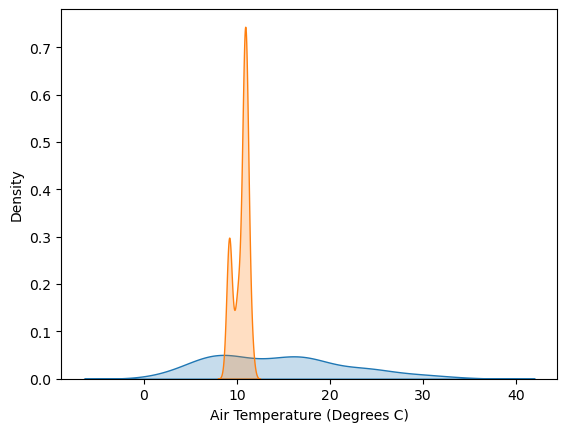

In [495]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [496]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

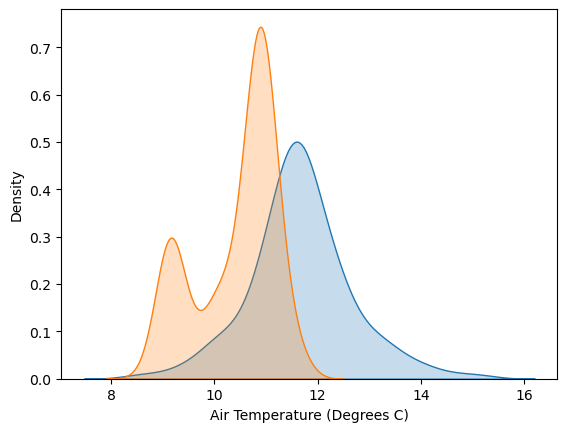

In [497]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [500]:
#result=pd.concat([ts1,ts2,ts3,ts4])
#result

In [529]:
from scipy.stats import johnsonsu

# Load your dataset into a NumPy array
data = pd.read_csv('data.csv')

# Fit the Johnson SU distribution to your data
a, b, loc, scale = johnsonsu.fit(data)

# The 'a' and 'b' parameters are now available for use
print('a:', a)
print('b:', b)

a: 1.2011500626388192
b: 1.0081551947944454


In [530]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[ -3.48544314  -0.97440987  -3.06998164  -0.76766084  -3.47576798
  -0.71784778  -2.68705537  -2.78824269  -0.08020214   0.34490112
  -8.37459882  -3.00749014  -0.02520902  -0.25006429   1.29393599
  -1.86674381  -1.44321769  -0.8324308   -0.80101169  -4.83183252
  -1.20195588  -1.72838738  -3.84165513  -1.08771108   0.36590937
  -4.79592497  -2.0735708   -2.19738067  -2.5305126   -2.4089186
  -3.71281573  -5.15066868   0.09217263  -0.52531735  -1.38132418
  -2.32553298  -1.86629334  -6.46494011  -1.46033886  -1.74267931
   0.18807162  -3.96518041  -7.61250834  -4.64849809  -0.76729113
   1.17539402  -0.35193792   1.02247662  -1.13534106  -0.27955926
  -0.8687339   -1.21269032  -1.10594686  -1.30746561  -1.99601015
  -1.25144685 -10.02553907  -2.80496387  -0.63754499   0.11289012
  -0.92469376  -0.10994747  -0.24309205  -1.4793565   -7.2968975
  -0.354306    -9.63322627  -1.81678893  -1.76380694   1.03657164
  -0.66235305  -1.48634357  -0.52229973  -0.814802    -3.23874596
   0.2408913

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

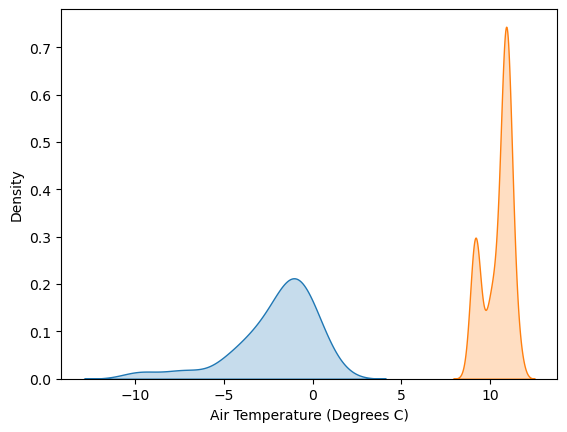

In [531]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

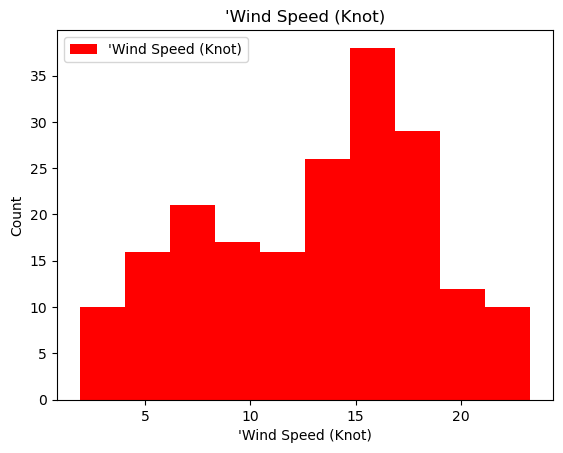

In [532]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

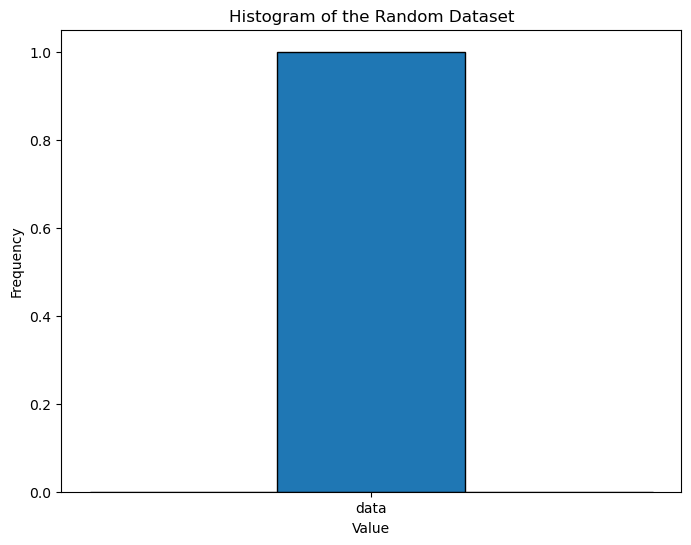

In [533]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [534]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [535]:
#rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

1.8452632776142812 0 23.7333644619791


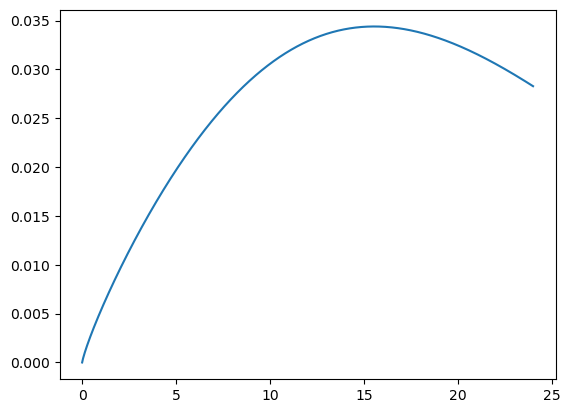

In [536]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

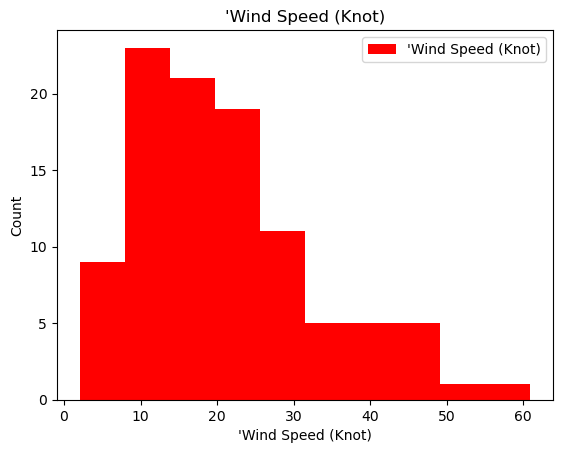

In [537]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

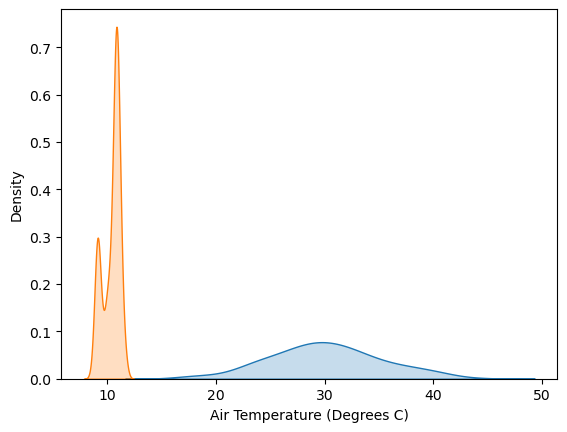

In [538]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

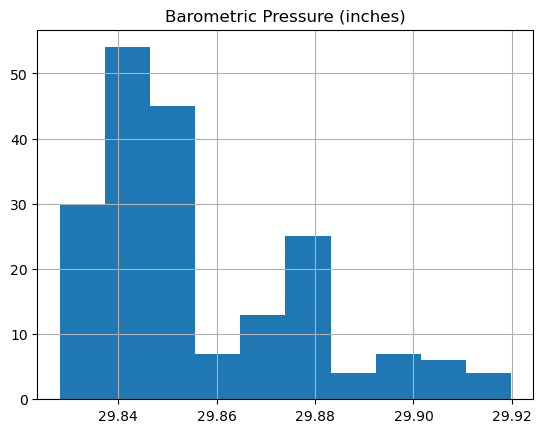

In [539]:
df3.hist('Barometric Pressure (inches)')
plt.show()
#plt.hist(df3('Barometric Pressure (inches)'))
#plt.show()

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

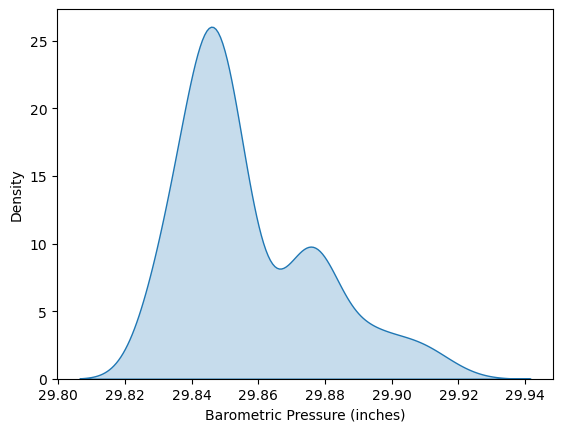

In [540]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

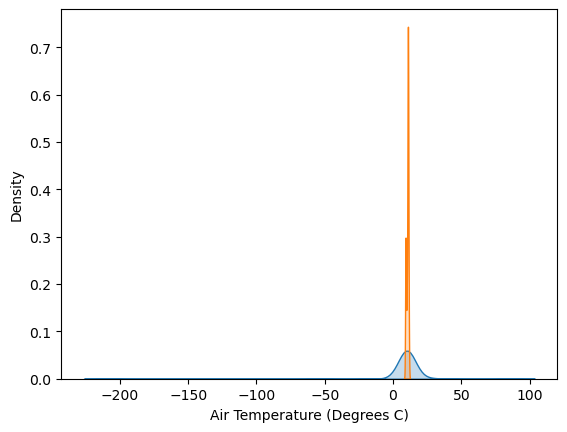

In [541]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

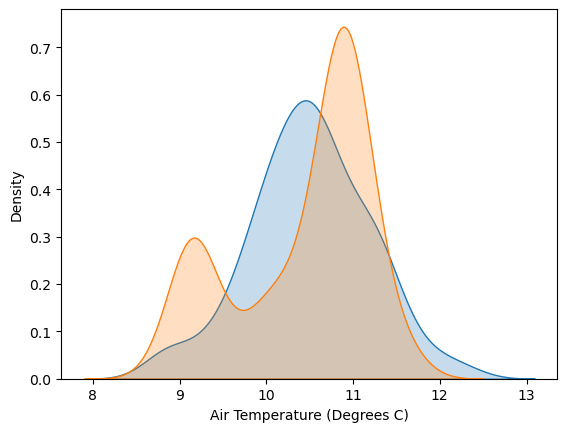

In [542]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 10.42
std_dev = 0.766

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

In [543]:


# Normal distribution variables
mu1, sigma1 = 29.8566, .0208
#mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)

# Create dataframe
df23 = pd.DataFrame({'normal1': normal1})

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

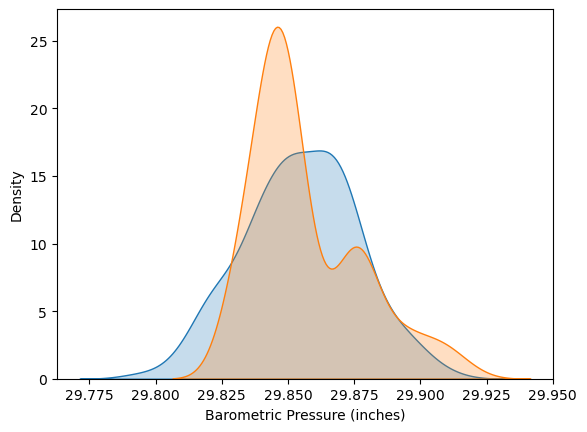

In [544]:
sns.kdeplot(normal1,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [545]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,276.397839
2023-11-08 00:01:33,271.077651
2023-11-08 00:02:33,265.095130
2023-11-08 00:03:33,267.397324
2023-11-08 00:04:33,278.667866
...,...
2023-11-08 01:35:33,282.429377
2023-11-08 01:36:33,278.644058
2023-11-08 01:37:33,279.729413
2023-11-08 01:38:33,283.055707


In [546]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

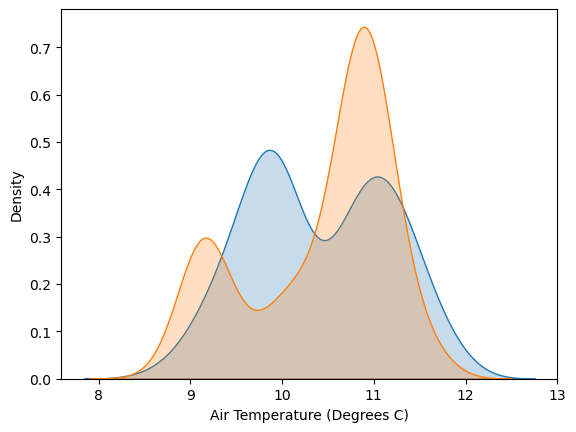

In [547]:
import numpy as np
from scipy.stats import dweibull
mean = 10.4225
std_dev = 0.7669

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


In [548]:
import numpy as np
from scipy.stats import weibull_min



In [549]:
mean = 30
std_dev = 0.02
min_val = 29.82
max_val = 29.91

# Calculate the shape and scale parameters
c = (max_val - mean) / (mean - min_val)
k = np.log(2) / np.log((c + 1) / c)
#scale = 1 # Set the scale parameter to a positive value

# Generate 1000 random numbers from the Weibull distribution
#data = weibull_min.rvs(k, loc=mean, scale=scale, size=1000)

C:\Users\irivyo\AppData\Local\Temp\ipykernel_7492\4112933684.py:8: RuntimeWarning: invalid value encountered in log
  k = np.log(2) / np.log((c + 1) / c)


Rayleigh PDF 

In [550]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

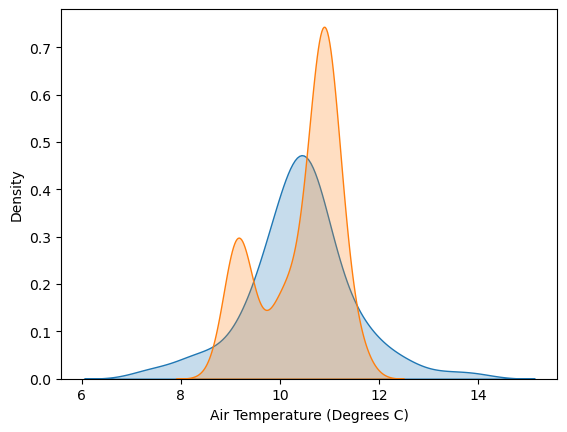

In [551]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [552]:
mean = 10.82
std_dev = 0.76
#min_val = 29.82
#max_val = 29.91

# Generate a normal distribution with the given mean and standard deviation
normal_dist = np.random.normal(mean, std_dev, 1000)

# Calculate the probability of getting a value between min_val and max_val


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

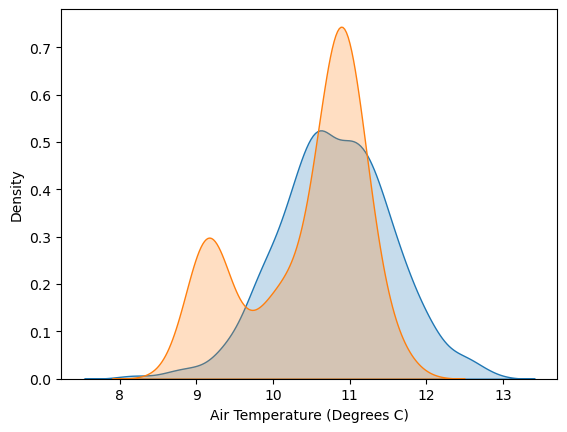

In [554]:
sns.kdeplot(normal_dist,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)